In [1]:
# Chargement des données
import os
import pandas as pd
import numpy as np
os.getcwd() 

'C:\\Users\\miras\\OneDrive\\Documents\\GitHub\\Bookmarkerspy'

In [2]:
ls

 Le volume dans le lecteur C s’appelle Windows-SSD
 Le numéro de série du volume est 6ECF-2E04

 Répertoire de C:\Users\miras\OneDrive\Documents\GitHub\Bookmarkerspy

29/10/2021  12:12    <DIR>          .
29/10/2021  12:12    <DIR>          ..
24/10/2021  23:41                48 .gitignore
24/10/2021  17:41    <DIR>          .ipynb_checkpoints
24/10/2021  19:45           102 655 audit_donnees.xlsx
24/10/2021  18:05         1 438 851 dataset_moyennes_matchs.csv
17/09/2021  19:08           719 827 DataViz.ipynb
24/10/2021  18:06           745 643 df_stats_cotes.csv
17/09/2021  19:08             1 099 LICENSE
29/10/2021  12:12           148 229 Predictive_Models.ipynb
24/10/2021  17:41           165 297 Preprocessing.ipynb
17/09/2021  19:08                15 README.md
               9 fichier(s)        3 321 664 octets
               3 Rép(s)  446 334 324 736 octets libres


In [3]:
df = pd.read_csv('dataset_moyennes_matchs.csv', index_col = 0)
df = df.reset_index(drop=True).set_index('match_id')
df.head()

,season,date,away_team_id,away_team_name,home_team_id,home_team_name,home_team_rating,home_won_contest,home_possession_percentage,home_total_throws,...,PSCH,PSCD,PSCA,Diff_def_home_fwd_away,Diff_def_home_mid_away,Diff_mil_home_att_away,Diff_mil_home_mid_away,Diff_mil_home_def_away,Diff_fwd_home_mid_away,Diff_fwd_home_def_away
match_id,,,,,,,,,,,,,,,,,,,,,
829595,2014_2015,2014-10-04 00:00:00,167,Manchester City,24,Aston Villa,6.519762,6.333333,38.133333,23.666667,...,8.70,5.00,1.42,-1.396667,-0.582667,-1.277444,-0.463444,-1.277444,-0.209333,-1.023333
829605,2014_2015,2014-10-04 00:00:00,162,Crystal Palace,214,Hull,6.802143,8.333333,41.300000,18.000000,...,2.18,3.45,3.67,-0.035556,-0.037056,-0.240333,-0.241833,-0.240333,-0.103167,-0.101667
829610,2014_2015,2014-10-04 00:00:00,184,Burnley,14,Leicester,6.957619,8.333333,37.066667,19.666667,...,1.72,4.05,5.20,0.842500,0.579000,0.745000,0.481500,0.745000,1.063167,1.326667
829615,2014_2015,2014-10-04 00:00:00,175,West Bromwich Albion,26,Liverpool,6.888462,9.333333,59.066667,20.000000,...,1.48,4.69,7.70,0.981667,0.171333,0.959333,0.149000,0.959333,0.009667,0.820000
829625,2014_2015,2014-10-04 00:00:00,96,Stoke,16,Sunderland,6.697381,11.000000,44.066667,20.000000,...,2.67,3.25,2.96,-0.764167,-0.416667,-0.437444,-0.089944,-0.437444,-0.433056,-0.780556


In [4]:
# Variable explicatives
feats_list = [# feats home
       'home_team_rating', 'home_won_contest', 'home_possession_percentage', 'home_total_throws', 'home_blocked_scoring_att', 
       'home_total_scoring_att', 'home_total_tackle', 'home_aerial_won', 'home_aerial_lost', 'home_accurate_pass', 
       'home_total_pass', 'home_won_corners', 'home_shot_off_target', 'home_ontarget_scoring_att','home_total_offside', 
       'home_post_scoring_att', 'home_att_pen_goal', 'home_penalty_save', 'HF', 'HY', 'HR', 'home_pass', 
       'goalkeeper_home_player_rating', 'defender_home_player_rating', 'midfielder_home_player_rating', 'forward_home_player_rating',
       # feats away
       'away_team_rating', 'away_won_contest', 'away_possession_percentage', 'away_total_throws', 'away_blocked_scoring_att',
       'away_total_scoring_att', 'away_total_tackle', 'away_aerial_won', 'away_aerial_lost', 'away_accurate_pass', 
       'away_total_pass', 'away_won_corners', 'away_shot_off_target', 'away_ontarget_scoring_att', 'away_total_offside', 
       'away_post_scoring_att', 'away_att_pen_goal', 'away_penalty_save', 'AF', 'AY', 'AR', 'away_pass',
       'goalkeeper_away_player_rating', 'defender_away_player_rating', 'midfielder_away_player_rating', 'forward_away_player_rating', 
        # Team Comparison
       'Diff_def_home_fwd_away', 'Diff_def_home_mid_away', 'Diff_mil_home_att_away', 'Diff_mil_home_mid_away',
       'Diff_mil_home_def_away', 'Diff_fwd_home_mid_away', 'Diff_fwd_home_def_away']
       
# Target
target_list = 'FTR'

# X_train, X_test, y_train, y_test // On entraine le smodèle sur la saison 2014_2015 jusque 2016_2017 puis on teste sur la
# saison 2017_2018

Train = df[df['season']!='2017_2018']
Test  = df[df['season']=='2017_2018']

# Creation des dataframes et targets par saison
X_train = Train[feats_list]
X_test  = Test[feats_list]

y_train = Train[target_list].reset_index(drop=True)
y_test  = Test[target_list].reset_index(drop=True)

# 1 - Modèles de classification

## 1.1 Régression Logistique

In [5]:
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, cross_val_score

# Regression logistique via leasticnet pour selection des variables importantes
parametres = {'C':[0.1,1,10],'l1_ratio': [0.1, 0.25, 0.8, 0.99]}
#parametres = {'C':[0.1,1,10],'alpha': [0.001, 0.025, 0.8, 1.0], 'l1_ratio': [0.1, 0.25, 0.8, 0.99]}
clf = linear_model.LogisticRegression(penalty = 'elasticnet', solver = 'saga', max_iter = 200)

grid_clf = GridSearchCV(estimator=clf, param_grid=parametres)
grille = grid_clf.fit(X_train,y_train)
print(grid_clf.best_params_) # Selection du meilleur parameter

C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "
C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which mean

{'C': 0.1, 'l1_ratio': 0.99}


C:\Users\miras\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [7]:
# Remarque:  "l1_ratio=1 is equivalent to using penalty='l1'"
from sklearn.metrics import classification_report 
optimal_clf = grid_clf.best_estimator_
y_pred_rlog = optimal_clf.predict(X_test)

# Evaluation du model
#cm = pd.crosstab(y_test, y_pred, rownames=['Classe réelle'], colnames=['Classe prédite'])

print(classification_report(y_test, pd.DataFrame(y_pred_rlog)))

              precision    recall  f1-score   support

           A       0.48      0.48      0.48       106
           D       0.00      0.00      0.00        95
           H       0.50      0.79      0.62       167

    accuracy                           0.50       368
   macro avg       0.33      0.42      0.37       368
weighted avg       0.37      0.50      0.42       368



C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [8]:
pd.crosstab(y_test, pd.Series(y_pred_rlog), rownames=['Classe réelle'], colnames=['Classe prédite'])
# Pss de predictions de matchs nuls

Classe prédite,A,H
Classe réelle,,
A,51,55
D,20,75
H,35,132


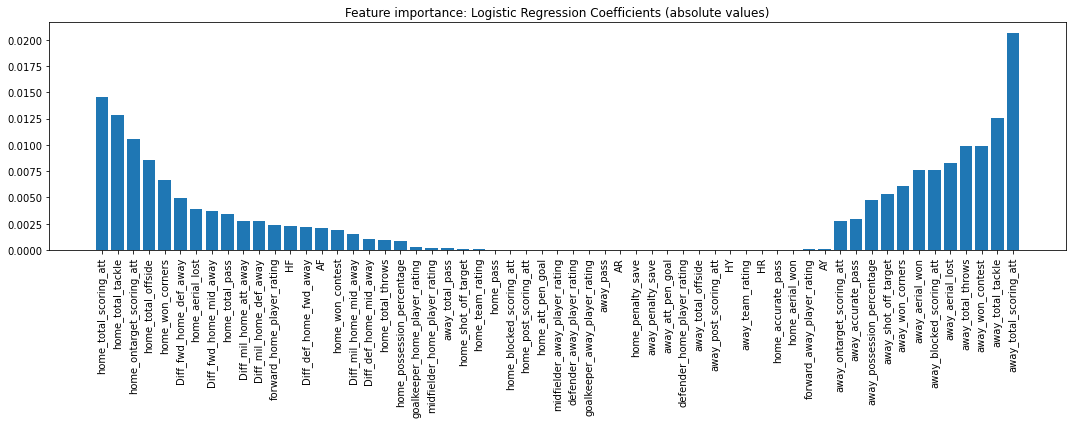

In [9]:
# QUID selection des variables via elasticnet ?
import matplotlib.pyplot as plt
# ligne a tracer (on a 3 lignes car 3 classes)
lgn = 0
elast_coef = optimal_clf.coef_[lgn,:]
sorted_idx = elast_coef.argsort()

y_ticks = np.arange(0, len(elast_coef))
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(y_ticks, np.abs(elast_coef[sorted_idx]))
ax.set_xticks(y_ticks)
ax.set_xticklabels(X_train.columns.values[sorted_idx], rotation='vertical')
ax.set_title("Feature importance: Logistic Regression Coefficients (absolute values)")
fig.tight_layout()
plt.show()



In [10]:
print(np.size(np.where(optimal_clf.coef_[0,:]==0)))
print(np.size(np.where(optimal_clf.coef_[1,:]==0)))
print(np.size(np.where(optimal_clf.coef_[2,:]==0)))
# Nombre de colonnes ayant un coefficient de la regression nul (pour chaqque colonne de la matrice de coefficients)

18
32
19


In [11]:
#Affichage des coefficients
del_col_0 = set(X_train.columns.values[np.where(optimal_clf.coef_[0,:]==0)])
print(del_col_0)

{'away_att_pen_goal', 'HR', 'defender_away_player_rating', 'away_post_scoring_att', 'HY', 'home_blocked_scoring_att', 'away_team_rating', 'midfielder_away_player_rating', 'defender_home_player_rating', 'away_penalty_save', 'goalkeeper_away_player_rating', 'home_post_scoring_att', 'home_pass', 'home_att_pen_goal', 'home_penalty_save', 'AR', 'away_total_offside', 'away_pass'}


In [12]:
del_col_1 = set(X_train.columns.values[np.where(optimal_clf.coef_[1,:]==0)])
print(del_col_1)

{'away_att_pen_goal', 'HY', 'defender_home_player_rating', 'goalkeeper_away_player_rating', 'home_pass', 'away_shot_off_target', 'goalkeeper_home_player_rating', 'Diff_mil_home_att_away', 'home_possession_percentage', 'home_post_scoring_att', 'home_att_pen_goal', 'home_penalty_save', 'AR', 'Diff_def_home_fwd_away', 'HR', 'forward_away_player_rating', 'away_total_scoring_att', 'away_total_tackle', 'home_total_throws', 'defender_away_player_rating', 'away_pass', 'away_post_scoring_att', 'Diff_mil_home_mid_away', 'away_won_corners', 'away_team_rating', 'midfielder_away_player_rating', 'away_penalty_save', 'Diff_def_home_mid_away', 'midfielder_home_player_rating', 'home_team_rating', 'Diff_mil_home_def_away', 'away_total_offside'}


In [13]:
del_col_2 = set(X_train.columns.values[np.where(optimal_clf.coef_[2,:]==0)])
print(del_col_2)

{'away_att_pen_goal', 'away_possession_percentage', 'HY', 'defender_home_player_rating', 'goalkeeper_away_player_rating', 'home_pass', 'home_post_scoring_att', 'home_att_pen_goal', 'home_penalty_save', 'AR', 'HR', 'defender_away_player_rating', 'away_pass', 'away_post_scoring_att', 'away_team_rating', 'midfielder_away_player_rating', 'away_penalty_save', 'AY', 'away_total_offside'}


In [14]:
# Colonnes en communs:
print('Nombre de colonnes à supprimer:',len(del_col_0.intersection(del_col_1, del_col_2)),'\n')
print(del_col_0.intersection(del_col_1, del_col_2))
to_drop = list(del_col_0.intersection(del_col_1, del_col_2))

Nombre de colonnes à supprimer: 17 

{'away_att_pen_goal', 'HR', 'defender_away_player_rating', 'away_post_scoring_att', 'HY', 'away_team_rating', 'midfielder_away_player_rating', 'defender_home_player_rating', 'away_penalty_save', 'goalkeeper_away_player_rating', 'home_post_scoring_att', 'home_pass', 'home_att_pen_goal', 'home_penalty_save', 'AR', 'away_total_offside', 'away_pass'}


In [15]:
# Suppression des colonnes ayant peu d'impact et standardisation pour la suite
X_train = X_train.drop(to_drop, axis=1)
X_test  = X_test.drop(to_drop, axis=1)

#Standardisation
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test) 

## 1.3 K plus proches Voisins

In [16]:
# Etude méthode KNN:
from sklearn import neighbors

parametres = {'n_neighbors': [1, 5, 10, 15], 'metric': ['manhattan', 'chebyshev', 'minkowski', 'l1' , 'l2'] }
knn = neighbors.KNeighborsClassifier()

grid_knn = GridSearchCV(estimator=knn, param_grid=parametres)
grille = grid_knn.fit(X_train_s,y_train)
print(grid_knn.best_params_) 
# Selection du meilleur parameter: Le max du nombre de voisin est toujours séléctionné

{'metric': 'manhattan', 'n_neighbors': 15}


In [17]:
optimal_knn = grid_knn.best_estimator_
y_pred_knn = optimal_knn.predict(X_test_s)
pd.crosstab(y_test, y_pred_knn, rownames=['Classe réelle'], colnames=['Classe prédite']) # Affichage matrice de confusion PLUSIEURS CLASSES POSSIBLES à classifier avec KNN
# On ne prédit aucun match nul

Classe prédite,A,D,H
Classe réelle,,,
A,54,10,42
D,25,13,57
H,34,7,126


In [18]:
print(classification_report(y_test, pd.DataFrame(y_pred_knn)))

              precision    recall  f1-score   support

           A       0.48      0.51      0.49       106
           D       0.43      0.14      0.21        95
           H       0.56      0.75      0.64       167

    accuracy                           0.52       368
   macro avg       0.49      0.47      0.45       368
weighted avg       0.50      0.52      0.49       368



## 1.4 SVM

In [19]:
from sklearn import svm
from sklearn import model_selection

clf_svm = svm.SVC()
clf_svm.fit(X_train_s, y_train)
parametres = {'C':[0.1,1,3,5], 'kernel':['rbf','linear'], 'gamma':[0.001, 0.005, 0.01, 0.1]}# Cross validation

grid_clf_svm = model_selection.GridSearchCV(estimator=clf_svm, param_grid=parametres)
grille = grid_clf_svm.fit(X_train_s,y_train)
print(grid_clf_svm.best_params_) # Affichage du meilleur parameter qui a été selectionné par default (fit)

{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}


In [21]:
#Prédiction des features test et création de la matrice de confusion
y_pred_svm = grid_clf_svm.predict(X_test_s)
pd.crosstab(y_test, y_pred_svm, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,A,H
Classe réelle,,
A,45,61
D,18,77
H,25,142


In [22]:
print(classification_report(y_test, pd.DataFrame(y_pred_svm)))

              precision    recall  f1-score   support

           A       0.51      0.42      0.46       106
           D       0.00      0.00      0.00        95
           H       0.51      0.85      0.64       167

    accuracy                           0.51       368
   macro avg       0.34      0.42      0.37       368
weighted avg       0.38      0.51      0.42       368



C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## 1.5 Decision Tree and Boosting

In [23]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

parametres = {'max_depth': [1, 2, 3, 5, 7]}
dtc = DecisionTreeClassifier() #Arbres de decision
grid_dtc = GridSearchCV(estimator=dtc, param_grid=parametres)
grille = grid_dtc.fit(X_train_s,y_train)

print("Score:", grid_dtc.score(X_test_s, y_test)) #Evaluation du modele 
print("Best Param:",grid_dtc.best_params_)

Score: 0.5163043478260869
Best Param: {'max_depth': 2}


In [24]:
y_pred_dtc = grid_dtc.predict(X_test_s)
pd.crosstab(y_test, y_pred_dtc, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,A,H
Classe réelle,,
A,43,63
D,16,79
H,20,147


In [25]:
print(classification_report(y_test, pd.DataFrame(y_pred_dtc)))

              precision    recall  f1-score   support

           A       0.54      0.41      0.46       106
           D       0.00      0.00      0.00        95
           H       0.51      0.88      0.64       167

    accuracy                           0.52       368
   macro avg       0.35      0.43      0.37       368
weighted avg       0.39      0.52      0.43       368



C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\miras\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [26]:
ac = AdaBoostClassifier(base_estimator=dtc, n_estimators=400) #BOOSTING
ac.fit(X_train_s, y_train)
y_pred_boost = ac.predict(X_test_s)

In [27]:
pd.crosstab(y_test, y_pred_boost, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,A,D,H
Classe réelle,,,
A,44,24,38
D,23,22,50
H,37,35,95


In [28]:
print(classification_report(y_test, pd.DataFrame(y_pred_boost)))

              precision    recall  f1-score   support

           A       0.42      0.42      0.42       106
           D       0.27      0.23      0.25        95
           H       0.52      0.57      0.54       167

    accuracy                           0.44       368
   macro avg       0.40      0.41      0.40       368
weighted avg       0.43      0.44      0.43       368



##  1.6 Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train_s, y_train)
parametres = {'max_depth': [3, 5, 7, 10],'n_estimators': [10, 30, 50, 100] }

grid_forest = GridSearchCV(estimator=forest, param_grid=parametres)
grille = grid_forest.fit(X_train_s,y_train)
print("Best Param:",grid_forest.best_params_)

Best Param: {'max_depth': 7, 'n_estimators': 50}


In [31]:
# On declare un nouveau model pour avoir acces à la variable "feature_importance" (indisponible via GridSearchCV)
best_forest = RandomForestClassifier(random_state=0, max_depth = 7, n_estimators = 50)
best_forest.fit(X_train_s, y_train)
y_pred_forest = best_forest.predict(X_test_s)
pd.crosstab(y_test, y_pred_forest, rownames=['Classe réelle'], colnames=['Classe prédite'])

Classe prédite,A,D,H
Classe réelle,,,
A,46,3,57
D,22,3,70
H,28,6,133


In [32]:
print(classification_report(y_test, pd.DataFrame(y_pred_forest)))

              precision    recall  f1-score   support

           A       0.48      0.43      0.46       106
           D       0.25      0.03      0.06        95
           H       0.51      0.80      0.62       167

    accuracy                           0.49       368
   macro avg       0.41      0.42      0.38       368
weighted avg       0.43      0.49      0.43       368



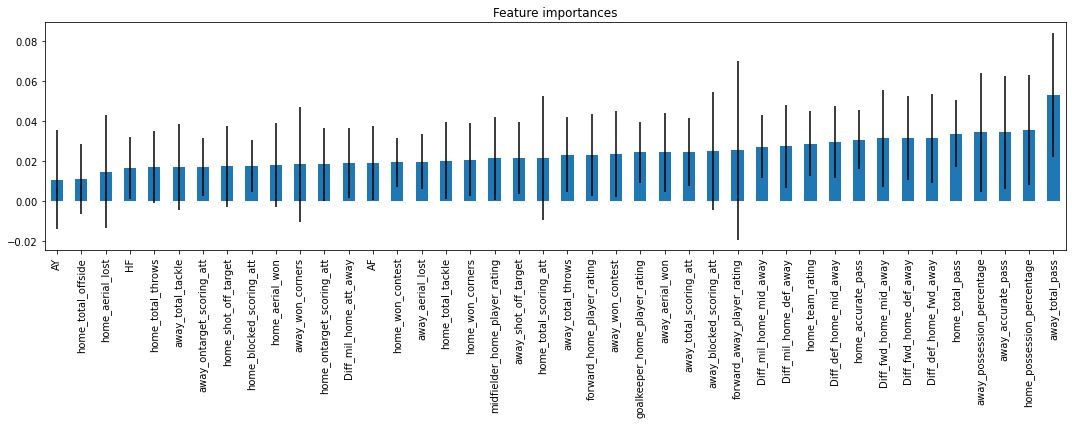

In [40]:
# On affiche l'importance des variables dans la classification (variable feature_importance et sa std sur 
# tous les arbres considerés de notre meilleur modele séléctionné)
importances = best_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=X_train.columns.values)
forest_importances = forest_importances[forest_importances.argsort().values]

fig, ax = plt.subplots(figsize=(15,6))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_xticklabels(forest_importances.index, rotation='vertical')
ax.set_title("Feature importances")
fig.tight_layout()
plt.show()
# Les variables crées avec le prefixe "Diff" paraissent pertinentes